In [1]:
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree

#---Read data from .csv---#
path = "C:/Users/pat1c/Documents/Uni/Y4/DM/CW/cardio_train.csv"
dataset = pd.read_csv(path, sep=';')

In [ ]:
#---Data Pre-processing---#

#Drop entry ID column
rule_prep = dataset.drop(columns=['id'])
#Convert age into years
rule_prep['age'] = (rule_prep['age'] / 365).astype(int)

#Remove outliers in height, weight and blood pressure columns
rule_prep = rule_prep[(rule_prep['height'] >= 140) & (rule_prep['height'] <= 200)
                      & (rule_prep['weight'] >= 30) & (rule_prep['weight'] <= 150)
                      & (rule_prep['ap_hi'] >= 90) & (rule_prep['ap_hi'] <= 200)
                      & (rule_prep['ap_lo'] >= 60) & (rule_prep['ap_lo'] <= 130)]

In [ ]:
#Separate test data
X = rule_prep.drop('cardio', axis=1)
y = rule_prep['cardio']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
#Create and cross-validate model
model = DecisionTreeClassifier(random_state=42)

cv_results = cross_validate(model, X_train, y_train, cv=10,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    return_train_score=True
)

for metric in ['train_accuracy', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']:
    print(f"{metric}: {cv_results[metric].mean():.4f}")

train_accuracy: 0.9880
test_accuracy: 0.6348
test_precision: 0.6333
test_recall: 0.6226
test_f1: 0.6279


In [ ]:
#Test the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Set: 0.6309954088111751
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.64      0.64     20682
           1       0.63      0.62      0.63     20266

    accuracy                           0.63     40948
   macro avg       0.63      0.63      0.63     40948
weighted avg       0.63      0.63      0.63     40948



Depth: 3
Tuned Accuracy: 0.7249438312005471
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74     20682
           1       0.75      0.67      0.71     20266

    accuracy                           0.72     40948
   macro avg       0.73      0.72      0.72     40948
weighted avg       0.73      0.72      0.72     40948

Depth: 5
Tuned Accuracy: 0.7281674318648041
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75     20682
           1       0.77      0.65      0.70     20266

    accuracy                           0.73     40948
   macro avg       0.73      0.73      0.73     40948
weighted avg       0.73      0.73      0.73     40948

Depth: 10
Tuned Accuracy: 0.7220132851421315
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74     20682
           1  

[Text(0.5, 0.9166666666666666, 'ap_hi <= 129.5\ngini = 0.5\nsamples = 27298\nvalue = [13788, 13510]\nclass = y[0]'),
 Text(0.25, 0.75, 'age <= 54.5\ngini = 0.434\nsamples = 16279\nvalue = [11095, 5184]\nclass = y[0]'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'cholesterol <= 2.5\ngini = 0.363\nsamples = 10040\nvalue = [7644.0, 2396.0]\nclass = y[0]'),
 Text(0.0625, 0.4166666666666667, 'ap_hi <= 119.5\ngini = 0.348\nsamples = 9618\nvalue = [7461, 2157]\nclass = y[0]'),
 Text(0.03125, 0.25, 'cholesterol <= 1.5\ngini = 0.262\nsamples = 3365\nvalue = [2844, 521]\nclass = y[0]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.24\nsamples = 2939\nvalue = [2530.0, 409.0]\nclass = y[0]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.388\nsamples = 426\nvalue = [314.0, 112.0]\nclass = y[0]'),
 Text(0.09375, 0.25, 'age <= 41.5\ngini = 0.386\nsamples = 6253\nvalue = [4617, 1636]\nclass = y[0]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.23\nsamples = 862

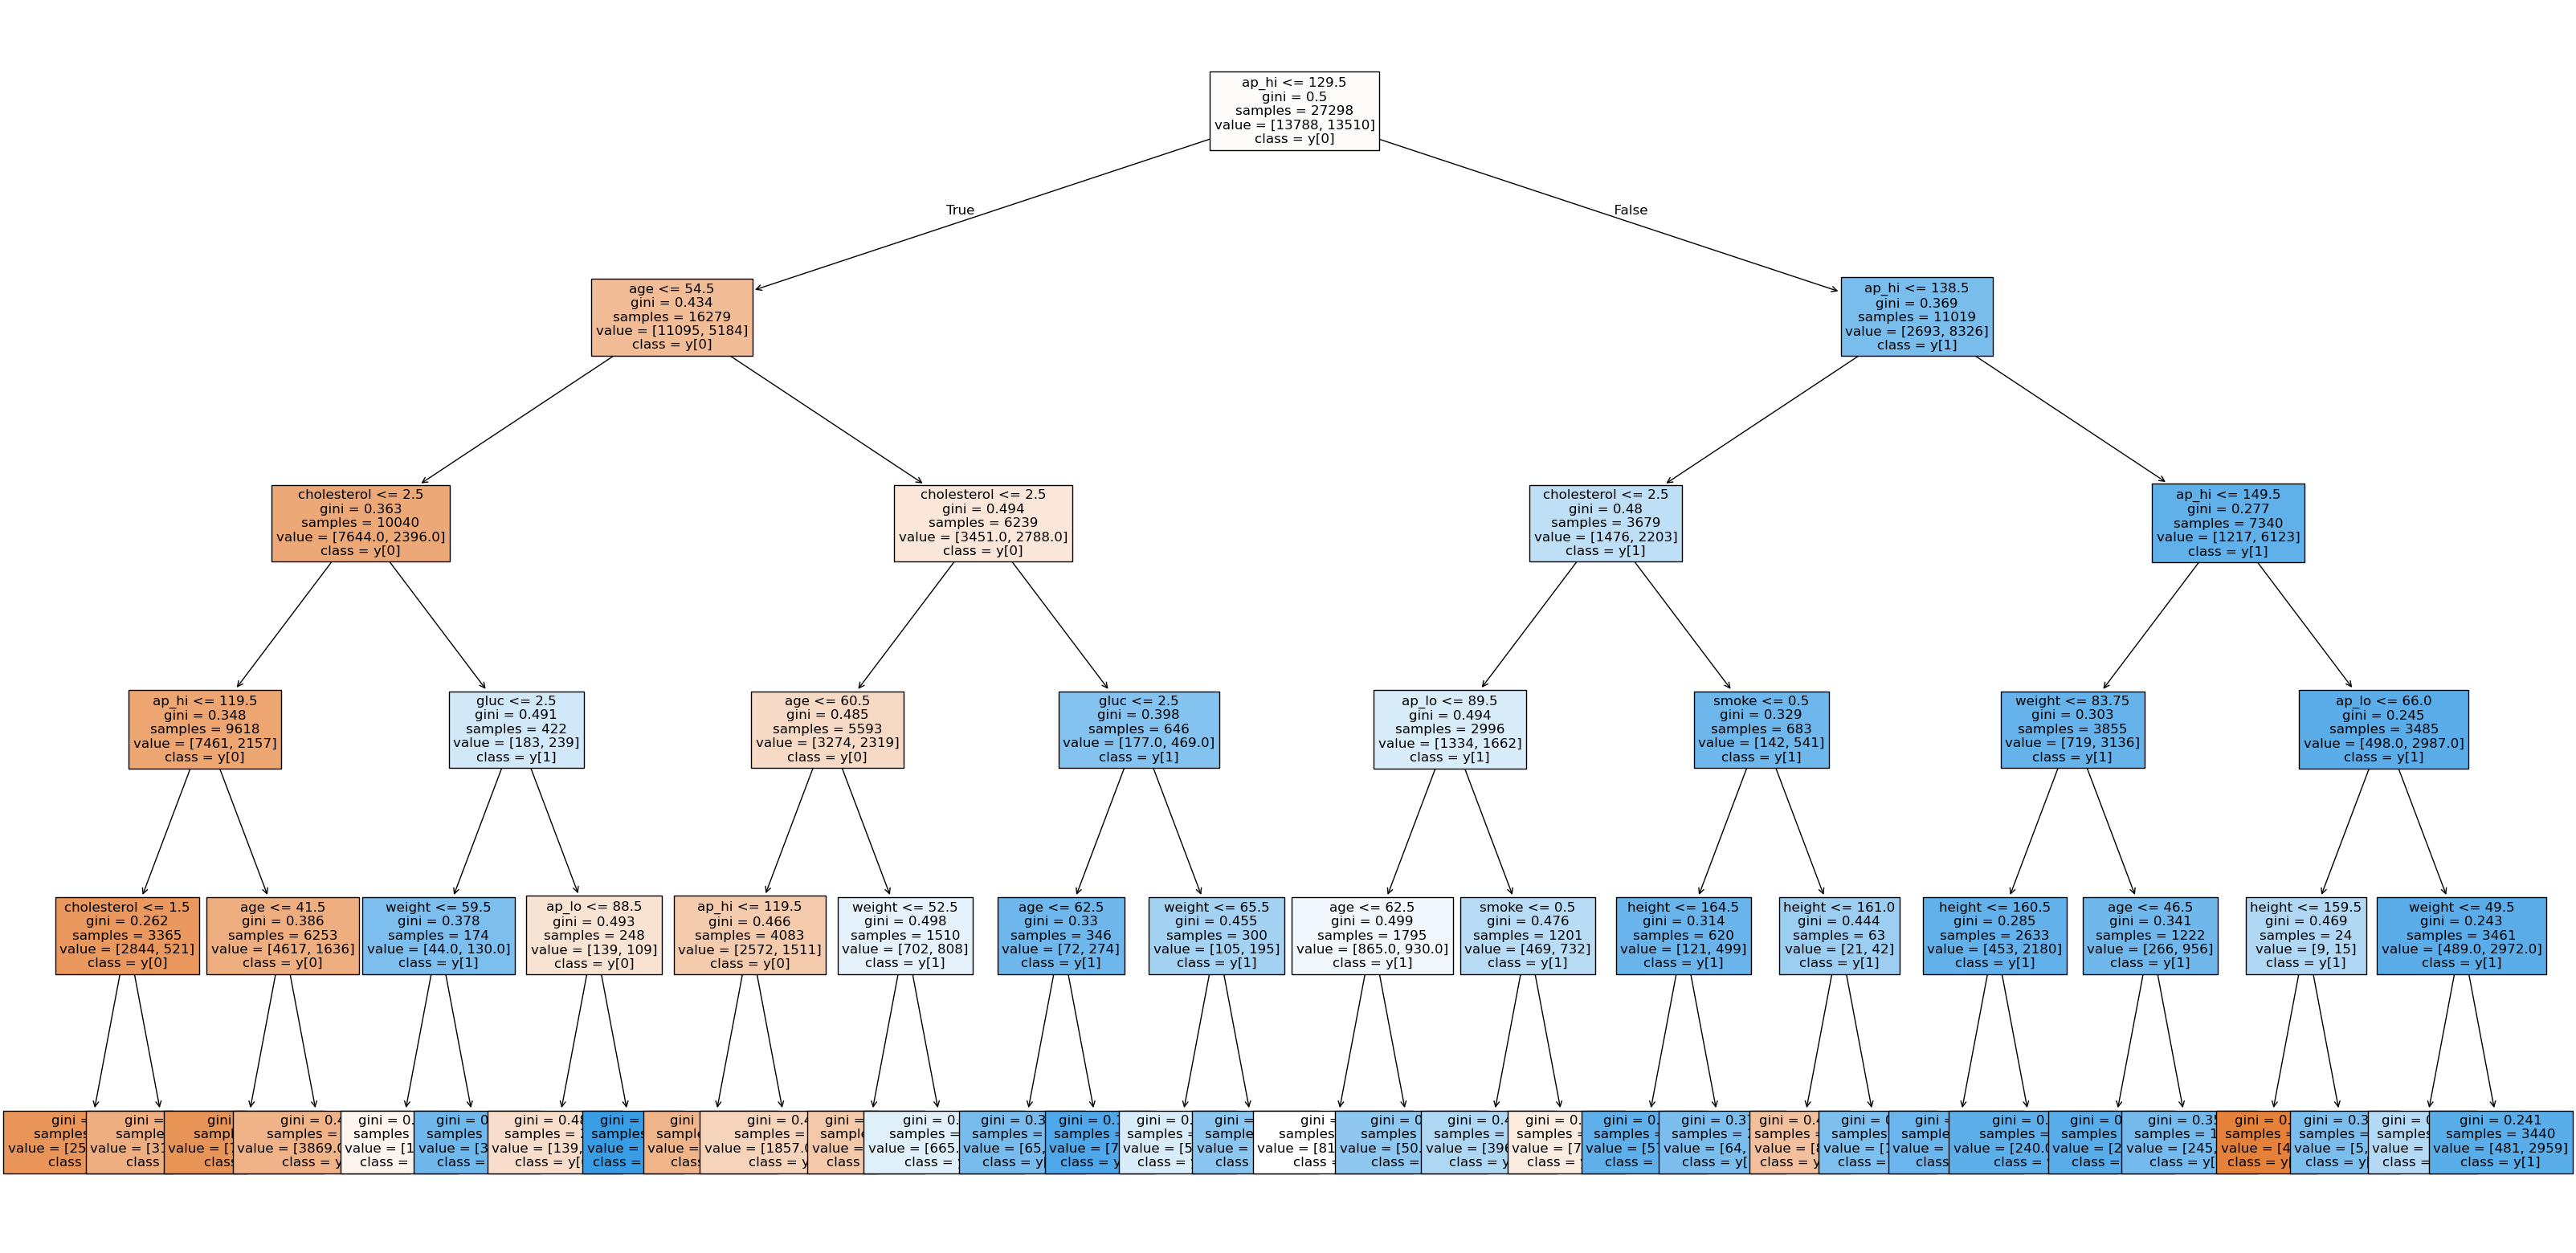

In [ ]:
#Tune tree depth
for depth in [3, 5, 10, None]:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Depth:", depth)
    print("Tuned Accuracy:", accuracy_score(y_test, y_pred))
    print("Tuned Classification Report:\n", classification_report(y_test, y_pred))

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(40, 20))
plot_tree(model, filled=True, feature_names=X.columns, class_names=True, fontsize=12)

Confidence Threshold:  0.001
Tuned Accuracy: 0.7270196346585914
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73     20682
           1       0.72      0.72      0.72     20266

    accuracy                           0.73     40948
   macro avg       0.73      0.73      0.73     40948
weighted avg       0.73      0.73      0.73     40948

Confidence Threshold:  0.003
Tuned Accuracy: 0.7249438312005471
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74     20682
           1       0.75      0.67      0.71     20266

    accuracy                           0.72     40948
   macro avg       0.73      0.72      0.72     40948
weighted avg       0.73      0.72      0.72     40948

Confidence Threshold:  0.005
Tuned Accuracy: 0.713758913744261
Tuned Classification Report:
               precision    recall  f1-score   support

          

c:\Users\pat1c\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pat1c\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pat1c\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[Text(0.5909090909090909, 0.875, 'ap_hi <= 129.5\ngini = 0.5\nsamples = 27298\nvalue = [13788, 13510]\nclass = y[0]'),
 Text(0.36363636363636365, 0.625, 'age <= 54.5\ngini = 0.434\nsamples = 16279\nvalue = [11095, 5184]\nclass = y[0]'),
 Text(0.4772727272727273, 0.75, 'True  '),
 Text(0.18181818181818182, 0.375, 'cholesterol <= 2.5\ngini = 0.363\nsamples = 10040\nvalue = [7644.0, 2396.0]\nclass = y[0]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.348\nsamples = 9618\nvalue = [7461, 2157]\nclass = y[0]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.491\nsamples = 422\nvalue = [183, 239]\nclass = y[1]'),
 Text(0.5454545454545454, 0.375, 'cholesterol <= 2.5\ngini = 0.494\nsamples = 6239\nvalue = [3451.0, 2788.0]\nclass = y[0]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.485\nsamples = 5593\nvalue = [3274, 2319]\nclass = y[0]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.398\nsamples = 646\nvalue = [177.0, 469.0]\nclass = y[1]'),
 Text(0.8181818181818182, 0.625, 'ap_hi <= 138.5\ngini = 0

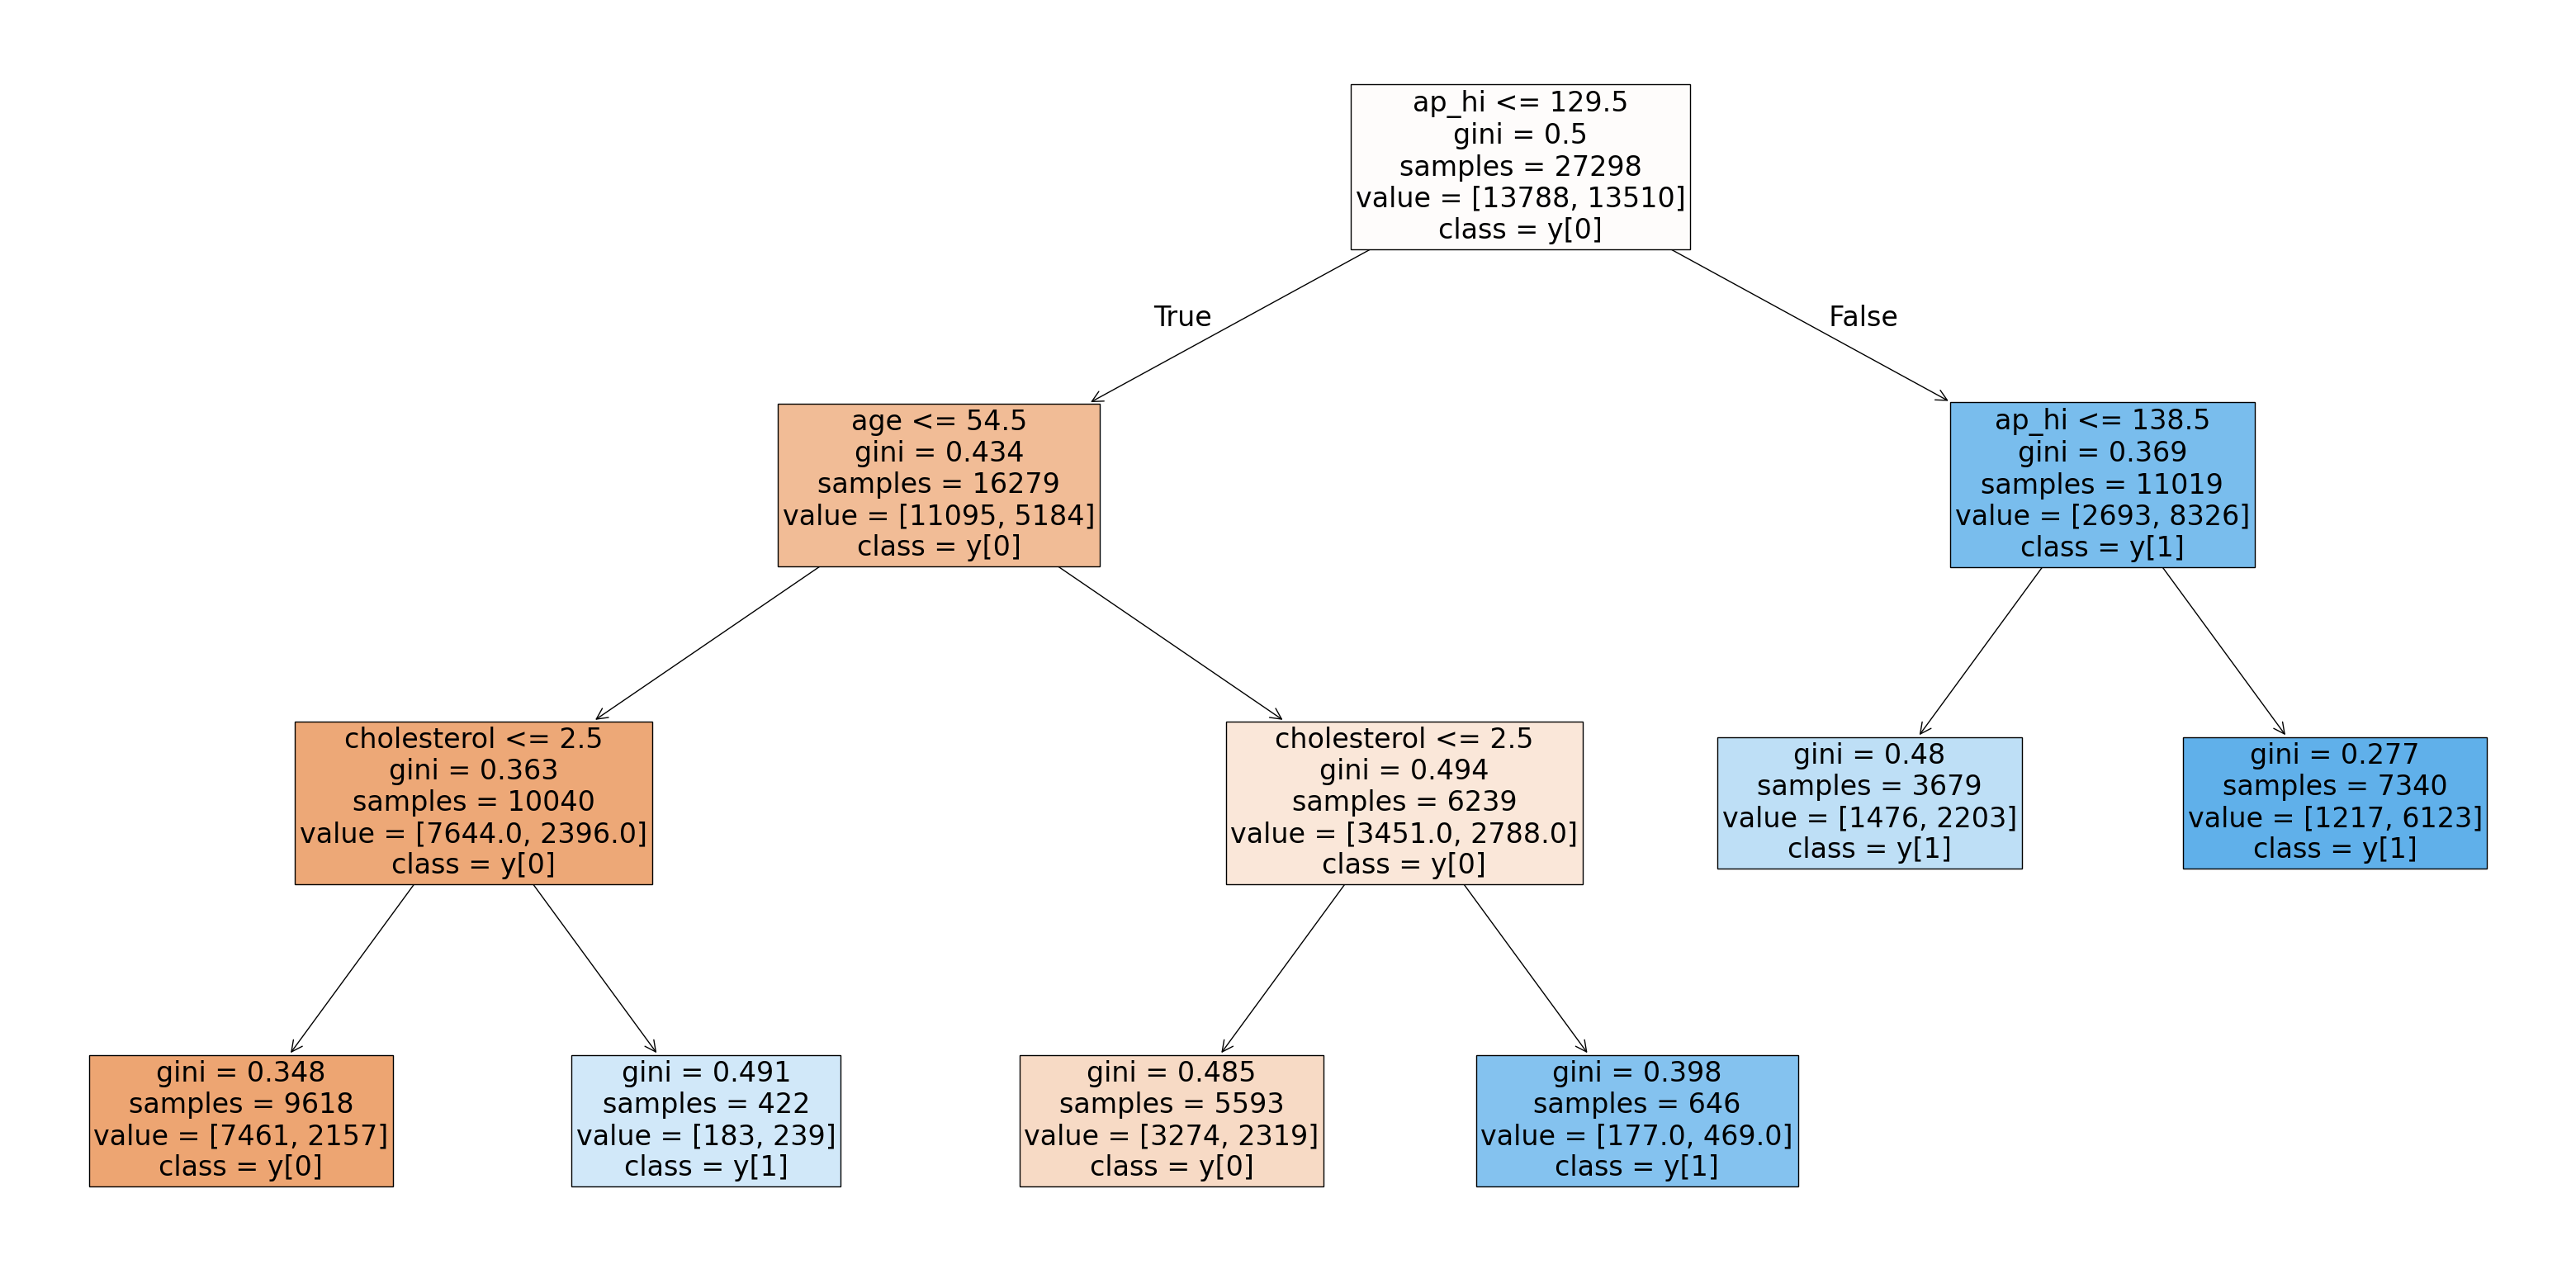

In [ ]:
#Tune confidence
for confidence in [0.001, 0.003, 0.005, 0.1]:
    model = DecisionTreeClassifier(max_depth=5, ccp_alpha=confidence, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Confidence Threshold: ", confidence)
    print("Tuned Accuracy:", accuracy_score(y_test, y_pred))
    print("Tuned Classification Report:\n", classification_report(y_test, y_pred))

model = DecisionTreeClassifier(max_depth=5, ccp_alpha=0.003, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(40, 20))
plot_tree(model, filled=True, feature_names=X.columns, class_names=True, fontsize=24)

Min_leaf:  1
Tuned Accuracy: 0.7249438312005471
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74     20682
           1       0.75      0.67      0.71     20266

    accuracy                           0.72     40948
   macro avg       0.73      0.72      0.72     40948
weighted avg       0.73      0.72      0.72     40948

Min_leaf:  2
Tuned Accuracy: 0.7249438312005471
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74     20682
           1       0.75      0.67      0.71     20266

    accuracy                           0.72     40948
   macro avg       0.73      0.72      0.72     40948
weighted avg       0.73      0.72      0.72     40948

Min_leaf:  3
Tuned Accuracy: 0.7249438312005471
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74     20682
   

[Text(0.5909090909090909, 0.875, 'ap_hi <= 129.5\ngini = 0.5\nsamples = 27298\nvalue = [13788, 13510]\nclass = y[0]'),
 Text(0.36363636363636365, 0.625, 'age <= 54.5\ngini = 0.434\nsamples = 16279\nvalue = [11095, 5184]\nclass = y[0]'),
 Text(0.4772727272727273, 0.75, 'True  '),
 Text(0.18181818181818182, 0.375, 'cholesterol <= 2.5\ngini = 0.363\nsamples = 10040\nvalue = [7644.0, 2396.0]\nclass = y[0]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.348\nsamples = 9618\nvalue = [7461, 2157]\nclass = y[0]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.491\nsamples = 422\nvalue = [183, 239]\nclass = y[1]'),
 Text(0.5454545454545454, 0.375, 'cholesterol <= 2.5\ngini = 0.494\nsamples = 6239\nvalue = [3451.0, 2788.0]\nclass = y[0]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.485\nsamples = 5593\nvalue = [3274, 2319]\nclass = y[0]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.398\nsamples = 646\nvalue = [177.0, 469.0]\nclass = y[1]'),
 Text(0.8181818181818182, 0.625, 'ap_hi <= 138.5\ngini = 0

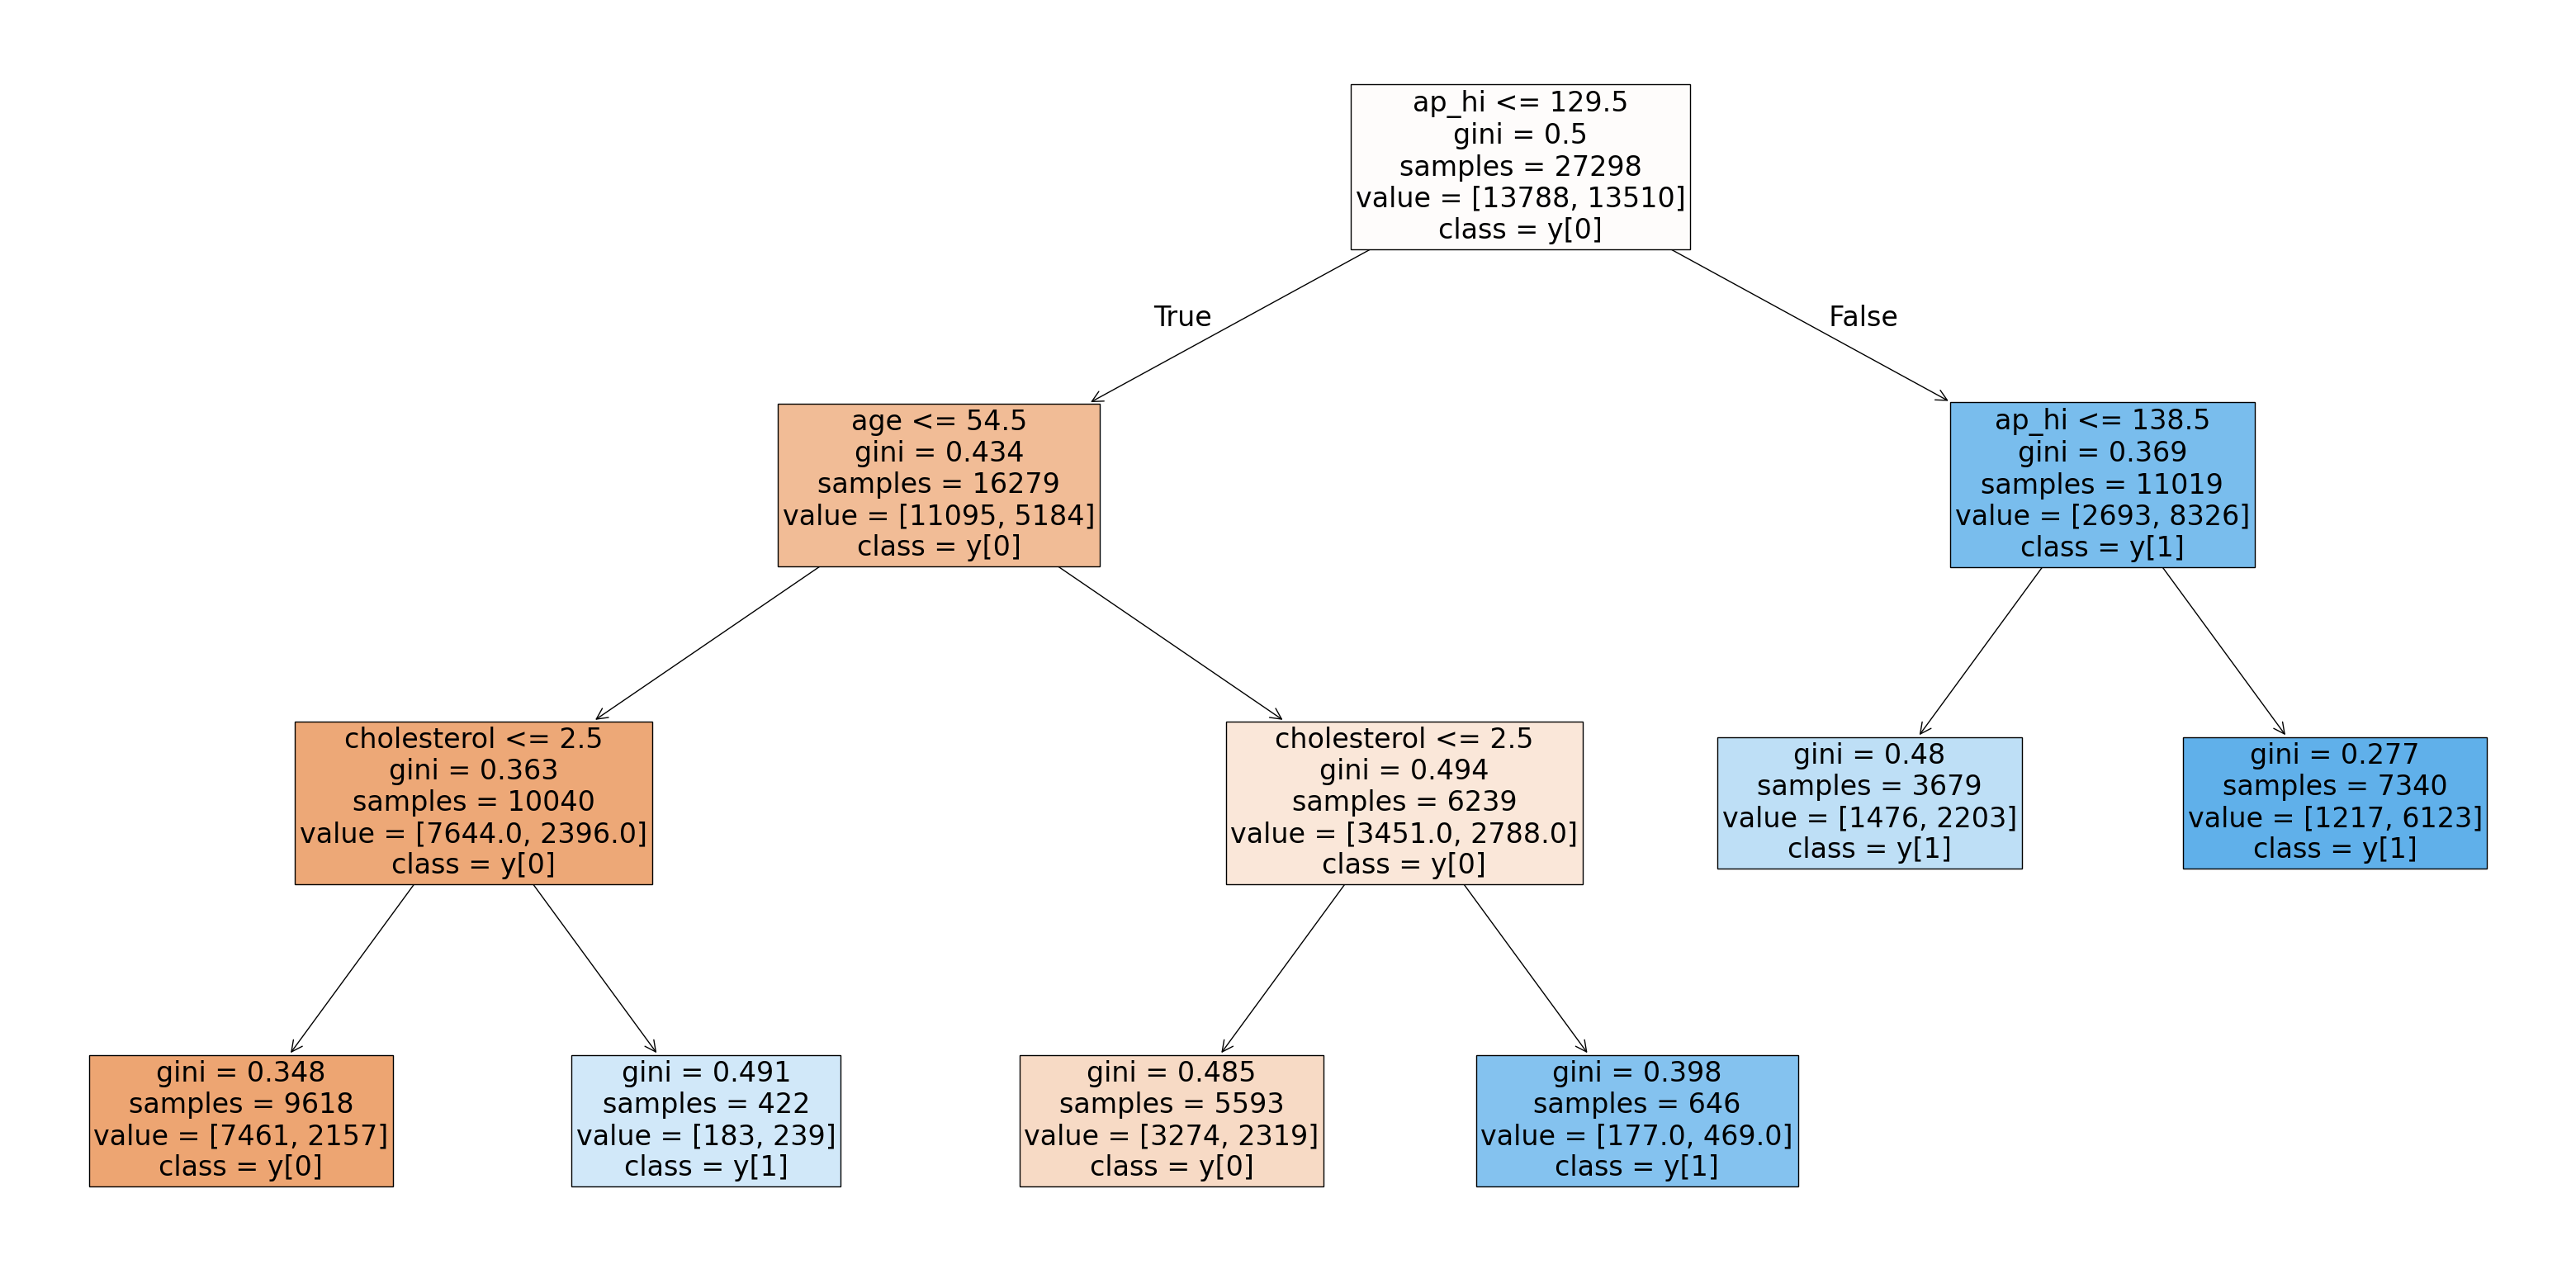

In [ ]:
#Tune min leaf value
for min_leaf in [1, 2, 3, 4, 5]:
    model = DecisionTreeClassifier(max_depth=5, ccp_alpha=0.003, min_samples_leaf=min_leaf, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Min_leaf: ", min_leaf)
    print("Tuned Accuracy:", accuracy_score(y_test, y_pred))
    print("Tuned Classification Report:\n", classification_report(y_test, y_pred))

model = DecisionTreeClassifier(max_depth=5, ccp_alpha=0.003, min_samples_leaf=1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(40, 20))
plot_tree(model, filled=True, feature_names=X.columns, class_names=True, fontsize=24)